# Titanic

## Imports

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Collecting data

In [10]:
# import data
train_data = pd.read_csv('Data/train.csv');
test_data = pd.read_csv('Data/test.csv');
test_results = pd.read_csv('Data/gender_submission.csv');

In [11]:
# column names
columns = list(train_data);

## Data analysis

In [13]:
# missing values analysis
# check how many missing values are in each column
missingValues = train_data.isna().sum();
missingValues = missingValues.sort_values(ascending=False);
print(missingValues);

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [57]:
def continuous_column_analysis(column):
    survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    plt.hist(survived,bins=25,alpha=0.5,label=column+' for survived');
    plt.hist(dead,bins=25,alpha=0.5,label=column+' for dead');
    plt.legend(loc='upper right');
    plt.title("Histograms for '"+column+"'");
    plt.show();

def stacked_bar_columns(column):
    # unique values
    uniqueValues = train_data[column].dropna().unique();
    uniqueValues.sort();
    
    # empty series for unique values
    baseSeries = pd.Series(data=np.zeros(len(uniqueValues)), index=uniqueValues);
    
    # column separated for survived and dead 
    survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    
    # column value counts
    survivedCounts = pd.concat([baseSeries,survived.value_counts()], axis=1)[column].fillna(0);
    deadCounts = pd.concat([baseSeries,dead.value_counts()], axis=1)[column].fillna(0);
    
    # stacked bar chart 
    survivedCounts.plot.bar(color="#006D2C",label="Survived");
    deadCounts.plot.bar(bottom=survivedCounts,color="#31A354",stacked=True,label="Dead");
    plt.legend(loc='upper right');
    plt.title("Stacked classes for '"+column+"'");
    plt.show();

def stacked_bar_class(column):
    # unique values
    uniqueValues = train_data[column].dropna().unique();
    uniqueValues.sort();
    
    #initial marginBottom
    marginBottom = pd.Series(data=[0,0])
    
    #chart colors
    colors = ["#006D2C","#31A354","#74C476","#556D2C","#55A354","#55C476","#DD6D2C","#DDA354","#DDC476"];

    # stacked bar chart    
    for num, value in enumerate(uniqueValues):
        col = train_data.loc[train_data[column]==value]["Survived"].dropna();
        colValues = col.value_counts().reindex([0,1]);
        colValues.plot.bar(bottom=marginBottom,color=colors[num],stacked=True,label=value);
        marginBottom += colValues;
    
    plt.legend(loc='upper right');
    plt.title("Stacked '"+column+"' values for classes");
    plt.show();

def values_percentage(column):
    values = train_data[column].dropna();
    valuesCount = len(values);
    
    # unique values
    uniqueValues = values.unique();
    uniqueValues.sort();
    
    # empty series for unique values
    baseSeries = pd.Series(data=np.zeros(len(uniqueValues)), index=uniqueValues);
    
    survived = train_data.loc[train_data["Survived"]==1][column].dropna();
    dead = train_data.loc[train_data["Survived"]==0][column].dropna();
    
    survivedCounts = pd.concat([baseSeries,survived.value_counts()], axis=1)[column].fillna(0);
    deadCounts = pd.concat([baseSeries,dead.value_counts()], axis=1)[column].fillna(0);
    
    table = pd.concat([
                survivedCounts.rename('Survived'),
                deadCounts.rename('Dead')
            ], axis=1) / valuesCount;
    
    sns.heatmap(table, annot=True, cmap="Greens");
    plt.show();

def quantized_column_analysis(column):
    stacked_bar_columns(column);
    stacked_bar_class(column);
    values_percentage(column);   

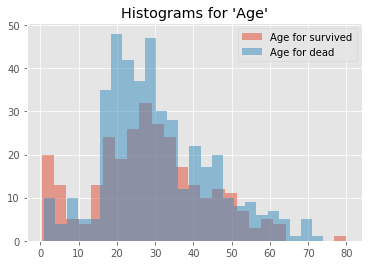

In [58]:
# 'Age' column analysis
continuous_column_analysis("Age");

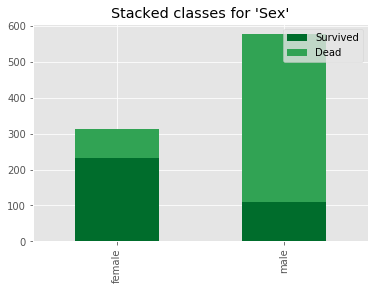

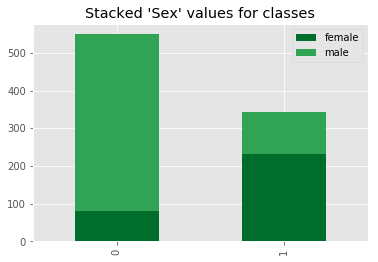

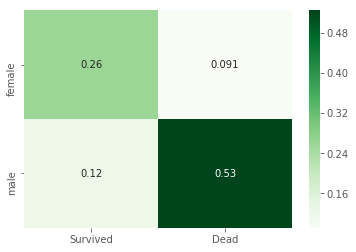

In [61]:
# 'Sex' column analysis
quantized_column_analysis("Sex");

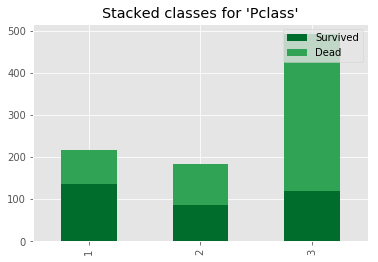

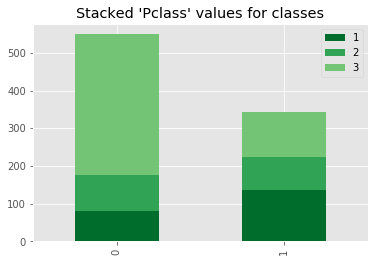

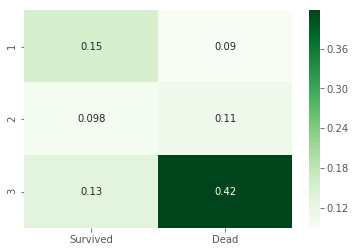

In [62]:
# 'Pclass' column analysis
quantized_column_analysis("Pclass");

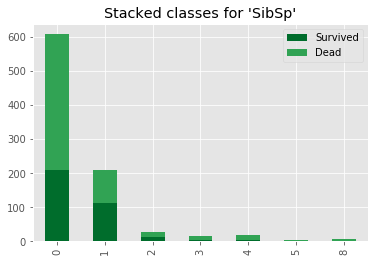

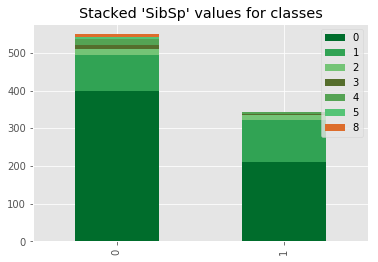

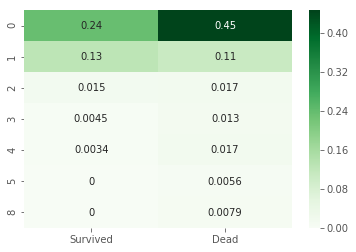

In [63]:
# 'SibSp' column analysis
quantized_column_analysis("SibSp");

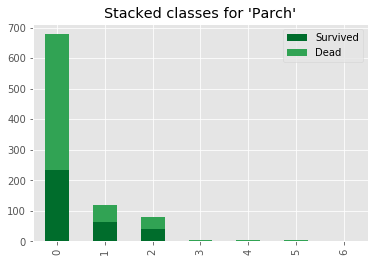

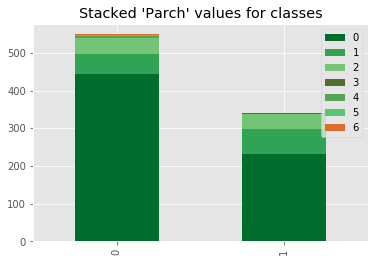

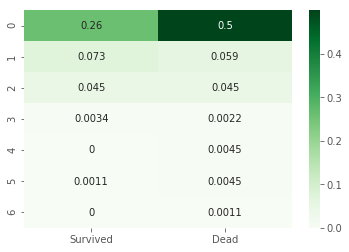

In [64]:
# 'Parch' column analysis
quantized_column_analysis("Parch");

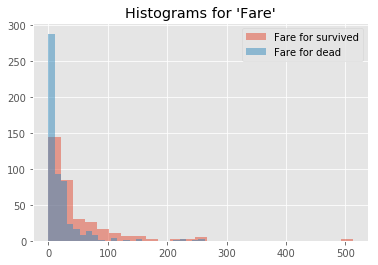

In [66]:
# 'Fare' column analysis
continuous_column_analysis("Fare");

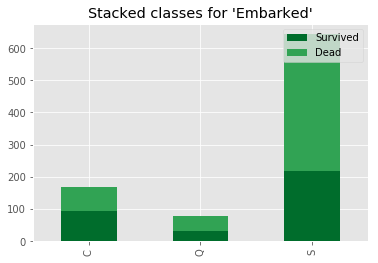

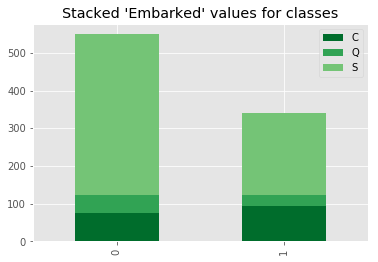

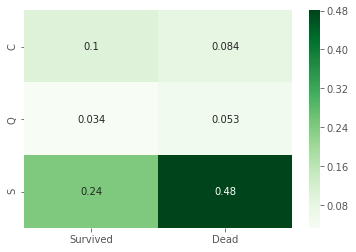

In [67]:
# 'Embarked' column analysis
quantized_column_analysis("Embarked");

## Feature engineering

### Dealing with missing values

### Tokenization

### Quantization/Binning

### Power Transforms

### Scaling/Normalisation

## Feature selection

## Modeling

## Charting